# EDA ( cleaning Text )
* Cleaning : lower text, drop punctuations, drop digits, expand contractions of english

In [2]:
import pandas as pd
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [3]:
!ls

contraction_expansion.txt  mar.txt  sample_data


In [4]:
df = pd.read_csv('/content/mar.txt',encoding='utf-8', sep='	',  names=['English', 'Marathi', 'Attribution'])

In [5]:
df.head()

,English,Marathi,Attribution
0,Go.,जा.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Run!,पळ!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
2,Run!,धाव!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Run!,पळा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
4,Run!,धावा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


#### Drop Attribution Column

In [6]:
df.drop(['Attribution'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46995 entries, 0 to 46994
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  46995 non-null  object
 1   Marathi  46995 non-null  object
dtypes: object(2)
memory usage: 734.4+ KB


In [8]:
df.isna().sum()

English    0
Marathi    0
dtype: int64

## Clean Text

#### Remove Mutiple Spaces

In [9]:
df.English = df.English.apply(lambda x: " ".join(x.split()))
df.Marathi = df.Marathi.apply(lambda x: " ".join(x.split()))

#### Lowercase only english characters because marathi dont have lower and uppercase


In [10]:
df.English = df.English.apply(lambda x: x.lower())

### Contraction to expansion of english text

##### this contraction dictionary is combination from lot of places

In [11]:
with open("/content/contraction_expansion.txt", 'rb') as fp:
    contractions= pickle.load(fp)


In [12]:
def expand_contras(text):
    '''
    takes input as word or list of words
    if it is string and contracted it will expand it
    example:
    it's --> it is
    won't --> would not
    '''
    if type(text) is str:
        for key in contractions:
            value = contractions[key]
            text = text.replace(key, value)
        return text
    else:
        return text


In [13]:
df.sample(10)


,English,Marathi
8667,is this pen tom's?,हे पेन टॉमचं आहे का?
46411,tom is living in the apartment that i used to ...,मी ज्या फ्लॅटमध्ये राहायचो त्या फ्लॅटमध्ये आता...
2308,how can it be?,कसं असू शकतं?
19768,does tom teach history?,टॉम इतिहास शिकवतो का?
23702,why do you want to stay?,तुला राहायचं का आहे?
23056,this book is very heavy.,हे पुस्तक एकदम जड आहे.
10280,he himself said so.,तोच स्वतः तसं म्हणाला.
25803,where were your children?,तुमची मुलं कुठे होती?
44853,"some fish live in rivers, others in the sea.",काही मासे नदीत राहतात तर काही समुद्रात.
132,we know.,आम्हाला माहीत आहे.


In [14]:
xyz = "i'm don't he'll you'll"
expand_contras(xyz)

'i am do not he will you will'

In [15]:
df.English = df.English.apply(lambda x: expand_contras(x))

In [16]:
df.sample(5)

,English,Marathi
41439,jack daniel's is a tennessee whiskey.,जॅक डॅनिएल्स टेनसीची व्हिस्की आहे.
29889,why did not you get married?,तुम्ही लग्न का नाही केलंत?
18478,that was not our fault.,ती आमची चूक नव्हती.
24330,how could they forget us?,ते आम्हाला विसरू कसे शकतात?
25189,they are very big apples.,ती अतिशय मोठी सफरचंद आहेत.


#### Remove all punctuations

In [17]:
translator= str.maketrans('','', string.punctuation)

In [18]:
df.English= df.English.apply(lambda x: x.translate(translator))
df.Marathi= df.Marathi.apply(lambda x: x.translate(translator))

In [19]:
df.sample(5)

,English,Marathi
13044,i think you are next,मला वाटतं यानंतर तू आहेस
22112,i already know his name,मला आधीच त्याचं नाव माहीत आहे
29119,she is famous as a soprano,तो सोप्रानो गायक म्हणून प्रसिद्ध आहे
29040,my wifes going to kill me,माझी बायको माझा जीव घेणार आहे
14803,all i have is a book,माझ्याकडे काही आहे तर फक्त हे पुस्तक


### Remove Digits

In [20]:
import re

In [21]:
df.English= df.English.apply(lambda x: re.sub(r'[\d]+','', x))
df.Marathi= df.Marathi.apply(lambda x: re.sub(r'[\d]+','', x))

## Visualize some features of dataset

#### Create new column for count of words

In [22]:
df['en_word_count']= df.English.apply(lambda x: len(x.split()))
df['mar_word_count']= df.Marathi.apply(lambda x: len(x.split()))

#### Create new column for count of characters

In [23]:
df['mar_char_count']= df.Marathi.apply(lambda x: len("".join(x.split())))
df['en_char_count']= df.English.apply(lambda x: len("".join(x.split())))

In [24]:
df.head()

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
0,go,जा,1,1,2,2
1,run,पळ,1,1,2,3
2,run,धाव,1,1,3,3
3,run,पळा,1,1,3,3
4,run,धावा,1,1,4,3


<ipython-input-25-0956ca3d7be8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.en_word_count, shade=True, color='blue', label='Real')


<Axes: xlabel='en_word_count', ylabel='Density'>

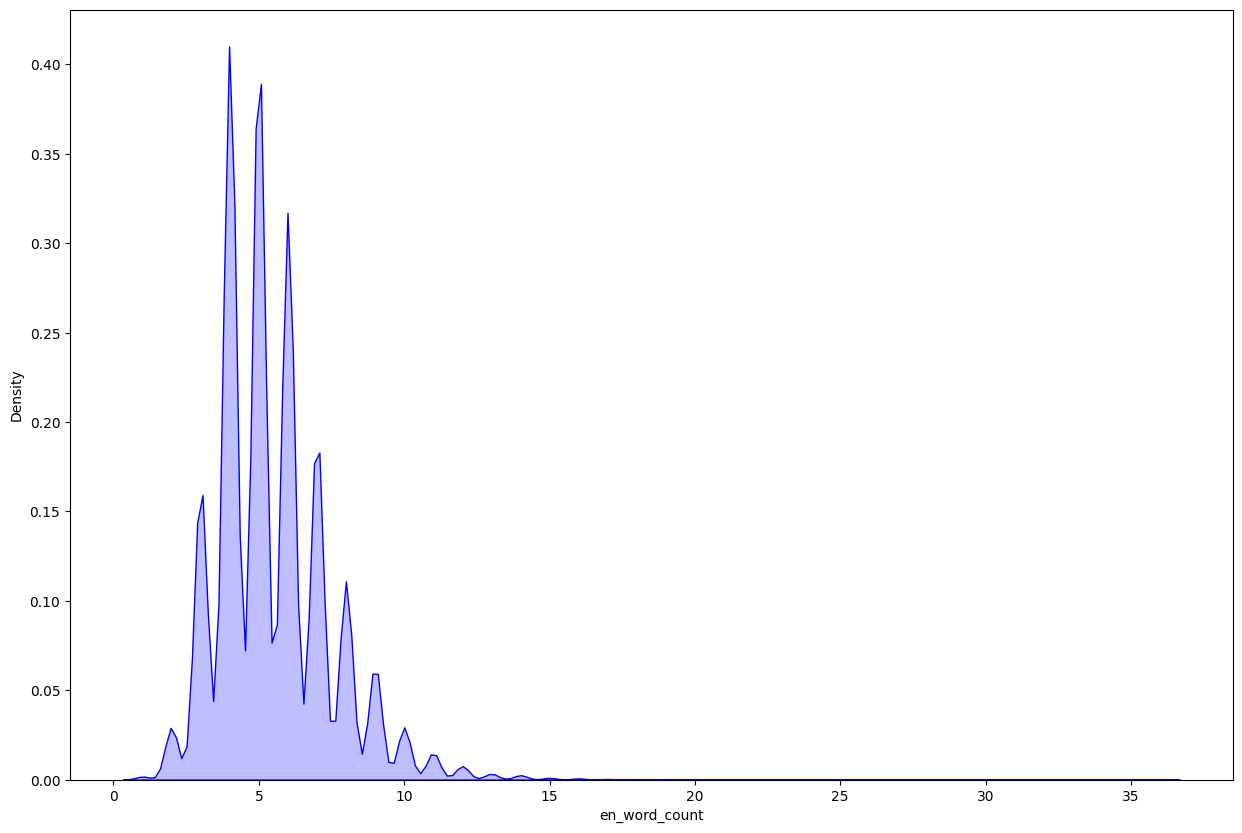

In [25]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.en_word_count, shade=True, color='blue', label='Real')

## It shows lot of sentences are of 4 to 7 word length.

In [26]:
max(df.en_word_count)

36

<ipython-input-27-d8022361d482>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.mar_word_count, shade=True, color='green', label='Real')


<Axes: xlabel='mar_word_count', ylabel='Density'>

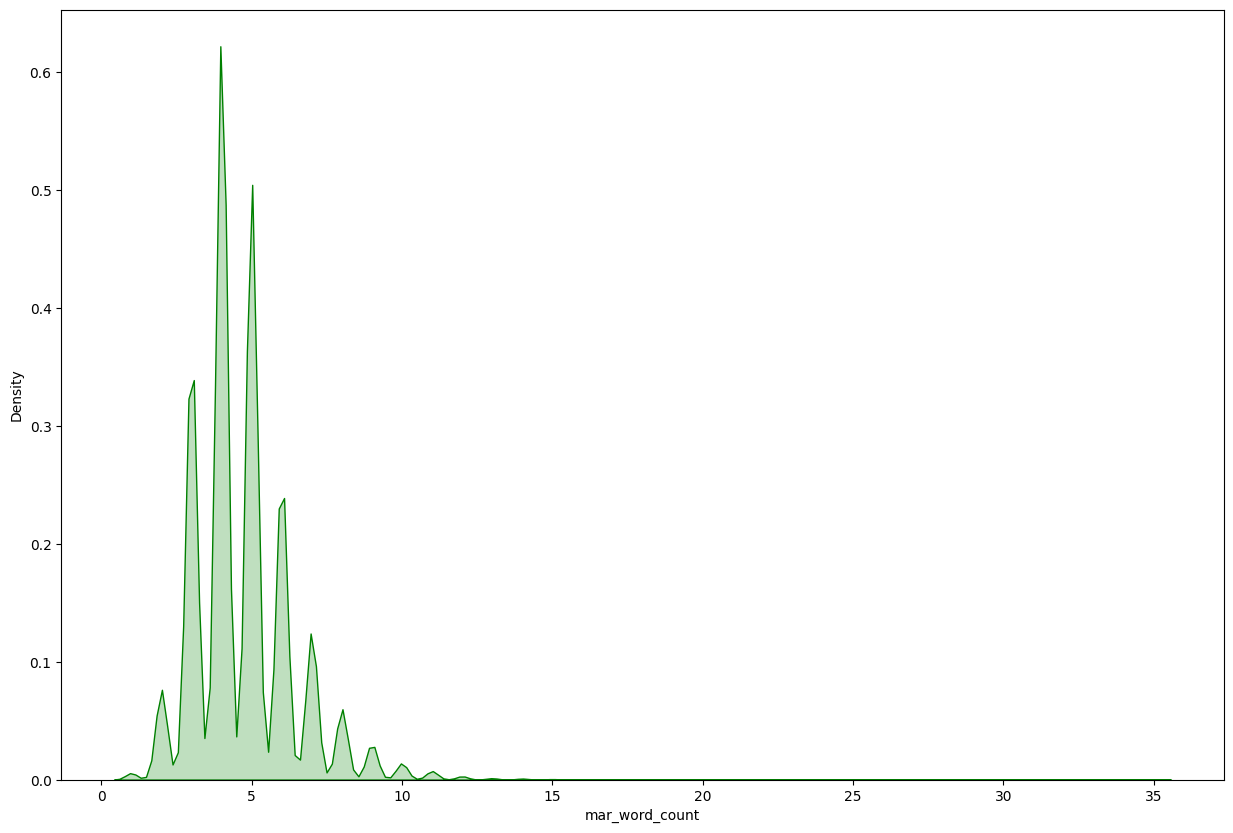

In [27]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.mar_word_count, shade=True, color='green', label='Real')

In [28]:
max(df.mar_word_count)

35

<ipython-input-29-70386d3322e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.en_char_count)


<Axes: ylabel='Density'>

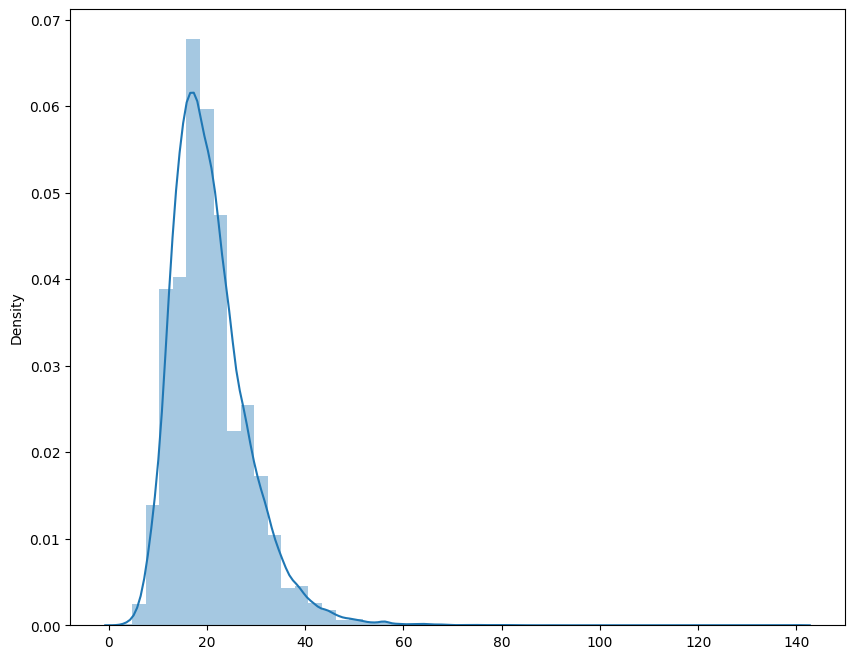

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.en_char_count)

<ipython-input-30-0eabde2021cf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df.mar_char_count)


<Axes: ylabel='Density'>

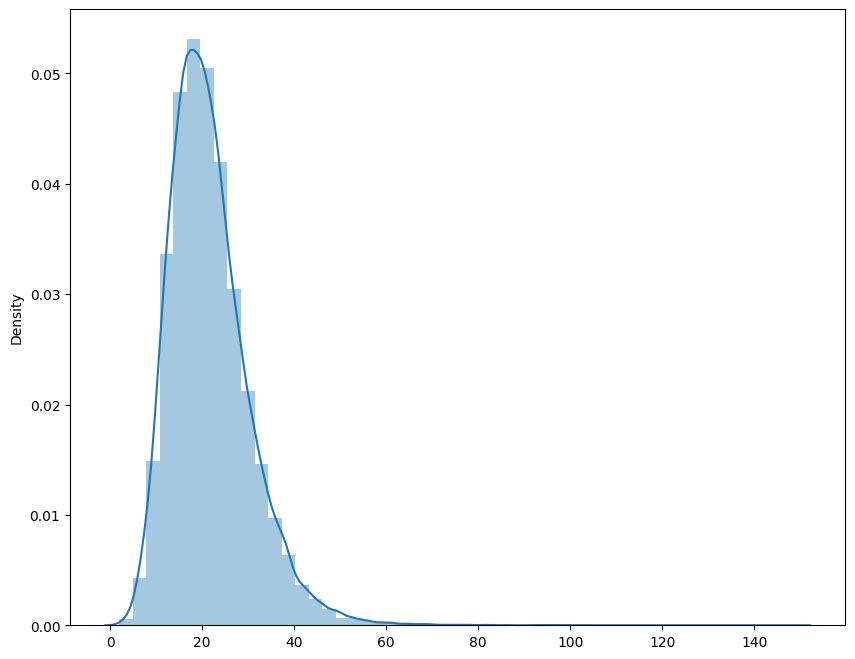

In [30]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.mar_char_count)

## Plot wordcloud

In [31]:
def plot_word_cloud(data):
    words=""
    for sent in data:
        sent= str(sent)
        sent=sent.lower()
        tokens= sent.split()
        words +=" ".join(tokens)+" "
    plt.figure(figsize=(15,12))
    wordcloud= WordCloud(width=800,height=800, background_color='aqua').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')


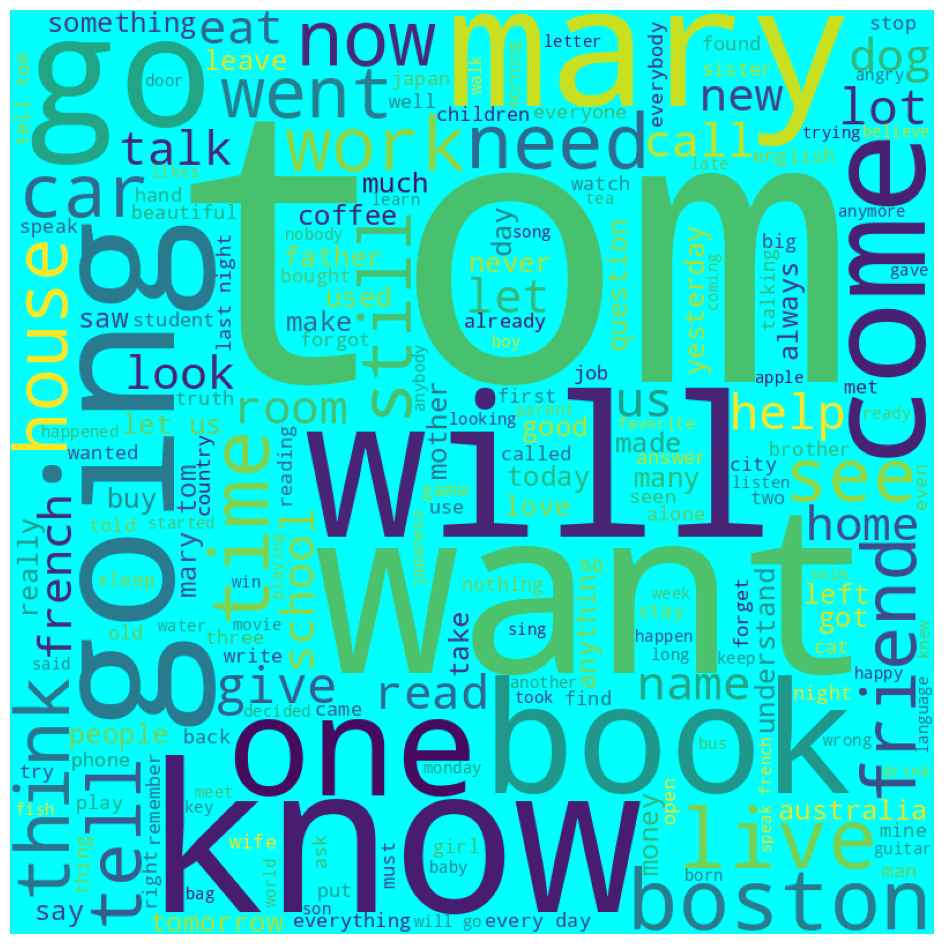

In [32]:
plot_word_cloud(df.English)

### Save Cleaned Text

In [36]:
df.head()

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
0,go,जा,1,1,2,2
1,run,पळ,1,1,2,3
2,run,धाव,1,1,3,3
3,run,पळा,1,1,3,3
4,run,धावा,1,1,4,3


In [35]:
df.to_csv("/content/cleaned.csv",index=None)

# Conclusion

* 41028 samples of sentenses
* Min len of both eng and mar sentence is 1
* Max len of both is 35 -- this will help for padding
* And we cleaned text removed all punctuatuins digits and expanded contractions in this notebook